In [1]:
# Imported the dependencies:
import pandas as pd
import numpy as np
import os
import re

# <u>Extracting</u> the data:

In [2]:
# Created a dictionary that relates the "_E" file ending to the 2007-2008 survey and the "_J" one to the 2017-2018:
survey_years = {"_E": "_0708",
                "_J": "_1718"}

In [3]:
# Listed the files contained in the directory "sas":
files_l = os.listdir("../sas")

# Removed the unneeded files, if there are any:
try:
    files_l.remove("columnreader")
    files_l.remove(".DS_Store")
except:
    pass
    
# Created an empty list to append the names of the DataFrames that will be created:
dfnames_l = []

# Looped the files in the directory "sas" to replace the file ending with its respective survey years:
for file in files_l:
    for key, value in survey_years.items():
        file = file.replace(".XPT", "").replace(key, value)
    dfnames_l.append(file)

# Printed the created lists:    
print(files_l)
print(dfnames_l)

['DEMO_E.XPT', 'CBQ_E.XPT', 'CBQ_J.XPT', 'DEMO_J.XPT']
['DEMO_0708', 'CBQ_0708', 'CBQ_1718', 'DEMO_1718']


In [4]:
# Created an empty dictionary to hold the four DataFrames that will be created:
dfs = {}

# Looped the names and files lists as tuples to read the correct SAS file and create the respective DataFrame:
for name, file in zip(dfnames_l, files_l):
    dfs[name] = pd.read_sas(f"../sas/{file}")
    
# Showed the first five rows of the NHANES demographics survey of 2007-2008:
dfs['DEMO_0708'].head()

,SEQN,SDDSRVYR,RIDSTATR,RIDEXMON,RIAGENDR,RIDAGEYR,RIDAGEMN,RIDAGEEX,RIDRETH1,DMQMILIT,...,FIAPROXY,FIAINTRP,MIALANG,MIAPROXY,MIAINTRP,AIALANG,WTINT2YR,WTMEC2YR,SDMVPSU,SDMVSTRA
0,41475.0,5.0,2.0,2.0,2.0,62.0,751.0,752.0,5.0,2.0,...,2.0,2.0,1.0,2.0,2.0,1.0,59356.356426,60045.772497,1.0,60.0
1,41476.0,5.0,2.0,1.0,2.0,6.0,81.0,82.0,5.0,NaN,...,2.0,2.0,NaN,NaN,NaN,NaN,35057.218405,35353.210440,1.0,70.0
2,41477.0,5.0,2.0,2.0,1.0,71.0,859.0,860.0,3.0,1.0,...,2.0,2.0,1.0,2.0,2.0,1.0,9935.266183,10074.150074,1.0,67.0
3,41478.0,5.0,2.0,2.0,2.0,1.0,17.0,17.0,3.0,NaN,...,2.0,2.0,NaN,NaN,NaN,NaN,12846.712058,14560.472652,2.0,59.0
4,41479.0,5.0,2.0,1.0,1.0,52.0,629.0,630.0,1.0,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,8727.797555,9234.055759,1.0,70.0


# <u>Transforming</u> the data:

In [5]:
# Created a list for each survey's codebook:
DEMO_0708_l = ["SEQN - Respondent sequence number",
               "SDDSRVYR - Data Release Number",
               "RIDSTATR - Interview/Examination Status",
               "RIDEXMON - Six month time period",
               "RIAGENDR - Gender",
               "RIDAGEYR - Age at Screening Adjudicated - Recode",
               "RIDAGEMN - Age in Months at Screening - Recode",
               "RIDAGEEX - Age in Months at Exam - Recode",
               "RIDRETH1 - Race/Ethnicity - Recode",
               "DMQMILIT - Served in the US Armed Forces",
               "DMDBORN2 - Country of Birth - Recode",
               "DMDCITZN - Citizenship Status",
               "DMDYRSUS - Length of time in US",
               "DMDEDUC3 - Education Level - Children/Youth 6-19",
               "DMDEDUC2 - Education Level - Adults 20+",
               "DMDSCHOL - Now attending school?",
               "DMDMARTL - Marital Status",
               "DMDHHSIZ - Total number of people in the Household",
               "DMDFMSIZ - Total number of people in the Family",
               "INDHHIN2 - Annual Household Income",
               "INDFMIN2 - Annual Family Income",
               "INDFMPIR - Ratio of family income to poverty",
               "RIDEXPRG - Pregnancy Status at Exam - Recode",
               "DMDHRGND - HH Ref Person Gender",
               "DMDHRAGE - HH Ref Person Age",
               "DMDHRBR2 - HH Ref Person Country of Birth",
               "DMDHREDU - HH Ref Person Education Level",
               "DMDHRMAR - HH Ref Person Marital Status",
               "DMDHSEDU - HH Ref Person's Spouse Education Level",
               "SIALANG - Language of SP Interview",
               "SIAPROXY - Proxy used in SP Interview?",
               "SIAINTRP - Interpreter used in SP Interview?",
               "FIALANG - Language of Family Interview",
               "FIAPROXY - Proxy used in Family Interview?",
               "FIAINTRP - Interpreter used in Family Interview?",
               "MIALANG - Language of MEC Interview",
               "MIAPROXY - Proxy used in MEC Interview?",
               "MIAINTRP - Interpreter used in MEC Interview?",
               "AIALANG - Language of ACASI Interview",
               "WTINT2YR - Full Sample 2 Year Interview Weight",
               "WTMEC2YR - Full Sample 2 Year MEC Exam Weight",
               "SDMVPSU - Masked Variance Pseudo-PSU",
               "SDMVSTRA - Masked Variance Pseudo-Stratum"]

CBQ_0708_l = ["SEQN - Respondent sequence number",
              "CBD010 - Anyone in the family on a special diet",
              "CBQ020 - Fruits available at home",
              "CBQ030 - Dark green vegetables available at home",
              "CBQ040 - Salty snacks available at home",
              "CBQ050 - Fat-free/low fat milk available at home",
              "CBQ060 - Soft drinks available at home",
              "CBD070 - Money spent at supermarket/grocery store",
              "CBD090 - Money spent on nonfood items",
              "CBD110 - Money spent on food at other stores",
              "CBD120 - Money spent on eating out",
              "CBD130 - Money spent on carryout/delivered foods",
              "CBQ140 - How often do you do major food shopping",
              "CBD150 - Time to get to grocery store",
              "CBD160 - # of times someone cooked dinner at home",
              "CBD170 - Time spent cooking dinner/cleaning up",
              "CBD180 - # of meals family ate together in 7 days",
              "CBQ190 - # of meals ate together cooked at home"]

CBQ_1718_l = ["SEQN - Respondent sequence number",
              "CBD071 - Money spent at supermarket/grocery store",
              "CBD091 - Money spent on nonfood items",
              "CBD111 - Money spent on food at other stores",
              "CBD121 - Money spent on eating out",
              "CBD131 - Money spent on carryout/delivered foods"]

DEMO_1718_l = ["SEQN - Respondent sequence number",
               "SDDSRVYR - Data release cycle",
               "RIDSTATR - Interview/Examination status",
               "RIAGENDR - Gender",
               "RIDAGEYR - Age in years at screening",
               "RIDAGEMN - Age in months at screening - 0 to 24 mos",
               "RIDRETH1 - Race/Hispanic origin",
               "RIDRETH3 - Race/Hispanic origin w/ NH Asian",
               "RIDEXMON - Six month time period",
               "RIDEXAGM - Age in months at exam - 0 to 19 years",
               "DMQMILIZ - Served active duty in US Armed Forces",
               "DMQADFC - Served in a foreign country",
               "DMDBORN4 - Country of birth",
               "DMDCITZN - Citizenship status",
               "DMDYRSUS - Length of time in US",
               "DMDEDUC3 - Education level - Children/Youth 6-19",
               "DMDEDUC2 - Education level - Adults 20+",
               "DMDMARTL - Marital status",
               "RIDEXPRG - Pregnancy status at exam",
               "SIALANG - Language of SP Interview",
               "SIAPROXY - Proxy used in SP Interview?",
               "SIAINTRP - Interpreter used in SP Interview?",
               "FIALANG - Language of Family Interview",
               "FIAPROXY - Proxy used in Family Interview?",
               "FIAINTRP - Interpreter used in Family Interview?",
               "MIALANG - Language of MEC Interview",
               "MIAPROXY - Proxy used in MEC Interview?",
               "MIAINTRP - Interpreter used in MEC Interview?",
               "AIALANGA - Language of ACASI Interview",
               "DMDHHSIZ - Total number of people in the Household",
               "DMDFMSIZ - Total number of people in the Family",
               "DMDHHSZA - # of children 5 years or younger in HH",
               "DMDHHSZB - # of children 6-17 years old in HH",
               "DMDHHSZE - # of adults 60 years or older in HH",
               "DMDHRGND - HH ref person's gender",
               "DMDHRAGZ - HH ref person's age in years",
               "DMDHREDZ - HH ref person's education level",
               "DMDHRMAZ - HH ref person's marital status",
               "DMDHSEDZ - HH ref person's spouse's education level",
               "WTINT2YR - Full sample 2 year interview weight",
               "WTMEC2YR - Full sample 2 year MEC exam weight",
               "SDMVPSU - Masked variance pseudo-PSU",
               "SDMVSTRA - Masked variance pseudo-stratum",
               "INDHHIN2 - Annual household income",
               "INDFMIN2 - Annual family income",
               "INDFMPIR - Ratio of family income to poverty"]

# Created a dictionary to link the name of each survey to its respective list:
all_codebooks_d = {dfnames_l[0]: DEMO_0708_l,
                   dfnames_l[1]: CBQ_0708_l,
                   dfnames_l[2]: CBQ_1718_l,
                   dfnames_l[3]: DEMO_1718_l}

# Specified the path where the TXT files will be created:
path = "../sas/columnreader"

# Created a variable that will be called to create the necesary folder(s):
new_dir = os.makedirs(path, exist_ok=True)

# Looped the items in the 'all_codebooks_d' dictionary to create a TXT file for each codebook:
for key, value in all_codebooks_d.items():
    file = open(f"{path}/{key}.txt", "w")
    for item in value:
        file.write(item+"\n")
    file.close()

In [6]:
# Listed the files contained in the recently created directory "sas/columnreader":
columnreader_l = os.listdir("../sas/columnreader")

# Sorted the variables so, once looped, the information in each variable matches each other:
columnreader_l.sort()
dfnames_l.sort()

# Removed the unneeded files, if there are any:
try:
    columnreader_l.remove(".DS_Store")
except:
    pass

# Created a dictionary to hold the name of each column of each survey based on its respective codebook:
texts_d = {}

# Looped the names of the DataFrames and the "column reader" files as a tuple to add the name of each column to the
# "texts" dictionary:
for name, file in zip(dfnames_l, columnreader_l):
    with open(f"{path}/{file}", "r") as f:
        texts_d[name] = f.read().strip().split("\n")

# Displayed the "texts" dictionary:
display(texts_d)

{'CBQ_0708': ['SEQN - Respondent sequence number',
  'CBD010 - Anyone in the family on a special diet',
  'CBQ020 - Fruits available at home',
  'CBQ030 - Dark green vegetables available at home',
  'CBQ040 - Salty snacks available at home',
  'CBQ050 - Fat-free/low fat milk available at home',
  'CBQ060 - Soft drinks available at home',
  'CBD070 - Money spent at supermarket/grocery store',
  'CBD090 - Money spent on nonfood items',
  'CBD110 - Money spent on food at other stores',
  'CBD120 - Money spent on eating out',
  'CBD130 - Money spent on carryout/delivered foods',
  'CBQ140 - How often do you do major food shopping',
  'CBD150 - Time to get to grocery store',
  'CBD160 - # of times someone cooked dinner at home',
  'CBD170 - Time spent cooking dinner/cleaning up',
  'CBD180 - # of meals family ate together in 7 days',
  'CBQ190 - # of meals ate together cooked at home'],
 'CBQ_1718': ['SEQN - Respondent sequence number',
  'CBD071 - Money spent at supermarket/grocery store',

In [7]:
# Created an empty dictionary that will hold the new names with which each column name in the DataFrames will be
# replaced:
column_renamer = {}

# Looped to get each codebook and store them in a new variable:
for name in dfnames_l:
    codebook = texts_d[name]
    
    # Created an empty dictionary that will hold the names with which each code will be replaced:
    line_d = {}
    
    # Looped the lines in each codebook, split the code and the description, and replaced some characters with
    # underscores:
    for line in codebook:
        split_line = re.findall("([A-z0-9]*) - ([#'A-z \/0-9\-?]*)", line)
        line_d[split_line[0][0]] = split_line[0][1].replace(" - ","_").replace(" ","_").replace("-","_")\
                                                    .replace("'s","").replace("/", "_").replace("?","")\
                                                    .replace("#","Num")
    column_renamer[name] = line_d
    
# Showed the "column renamer" dictionary:
display(column_renamer)

{'CBQ_0708': {'SEQN': 'Respondent_sequence_number',
  'CBD010': 'Anyone_in_the_family_on_a_special_diet',
  'CBQ020': 'Fruits_available_at_home',
  'CBQ030': 'Dark_green_vegetables_available_at_home',
  'CBQ040': 'Salty_snacks_available_at_home',
  'CBQ050': 'Fat_free_low_fat_milk_available_at_home',
  'CBQ060': 'Soft_drinks_available_at_home',
  'CBD070': 'Money_spent_at_supermarket_grocery_store',
  'CBD090': 'Money_spent_on_nonfood_items',
  'CBD110': 'Money_spent_on_food_at_other_stores',
  'CBD120': 'Money_spent_on_eating_out',
  'CBD130': 'Money_spent_on_carryout_delivered_foods',
  'CBQ140': 'How_often_do_you_do_major_food_shopping',
  'CBD150': 'Time_to_get_to_grocery_store',
  'CBD160': 'Num_of_times_someone_cooked_dinner_at_home',
  'CBD170': 'Time_spent_cooking_dinner_cleaning_up',
  'CBD180': 'Num_of_meals_family_ate_together_in_7_days',
  'CBQ190': 'Num_of_meals_ate_together_cooked_at_home'},
 'CBQ_1718': {'SEQN': 'Respondent_sequence_number',
  'CBD071': 'Money_spent_at_s

In [8]:
# Looped the DataFrames to rename each column:
for name in dfnames_l:
    dfs[name] = dfs[name].rename(columns=column_renamer[name])

# Listed the new column names of the first DataFrame, which is the NHANES consumer behavior survey of 2007-2008:
list(dfs[dfnames_l[0]].columns)

['Respondent_sequence_number',
 'Anyone_in_the_family_on_a_special_diet',
 'Fruits_available_at_home',
 'Dark_green_vegetables_available_at_home',
 'Salty_snacks_available_at_home',
 'Fat_free_low_fat_milk_available_at_home',
 'Soft_drinks_available_at_home',
 'Money_spent_at_supermarket_grocery_store',
 'Money_spent_on_nonfood_items',
 'Money_spent_on_food_at_other_stores',
 'Money_spent_on_eating_out',
 'Money_spent_on_carryout_delivered_foods',
 'How_often_do_you_do_major_food_shopping',
 'Time_to_get_to_grocery_store',
 'Num_of_times_someone_cooked_dinner_at_home',
 'Time_spent_cooking_dinner_cleaning_up',
 'Num_of_meals_family_ate_together_in_7_days',
 'Num_of_meals_ate_together_cooked_at_home']

In [9]:
# Created an empty dictionary to hold the two new merged DataFrames that will be created:
merged_dfs = {}

# Looped the survey years to correctly merge the demographics and consumer behavior DataFrames of each year based on
# the "respondent sequence number":
for key, value in survey_years.items():
    year_tables = list(filter(lambda x:value in x, dfnames_l))
    dfs_merge = dfs[year_tables[0]]
    for i, table in enumerate(year_tables):
        if i > 0:
            dfs_merge = dfs_merge.merge(dfs[table], on="Respondent_sequence_number")
    merged_dfs[value] = dfs_merge
merged_dfs["_1718"]

,Respondent_sequence_number,Money_spent_at_supermarket_grocery_store,Money_spent_on_nonfood_items,Money_spent_on_food_at_other_stores,Money_spent_on_eating_out,Money_spent_on_carryout_delivered_foods,Data_release_cycle,Interview_Examination_status,Gender,Age_in_years_at_screening,...,HH_ref_person_education_level,HH_ref_person_marital_status,HH_ref_person_spouse_education_level,Full_sample_2_year_interview_weight,Full_sample_2_year_MEC_exam_weight,Masked_variance_pseudo_PSU,Masked_variance_pseudo_stratum,Annual_household_income,Annual_family_income,Ratio_of_family_income_to_poverty
0,93703.0,100.0,5.397605e-79,4.000000e+02,200.0,3.000000e+01,10.0,2.0,2.0,2.0,...,3.0,1.0,3.0,9246.491865,8539.731348,2.0,145.0,15.0,15.0,5.00
1,93704.0,900.0,3.000000e+01,5.397605e-79,50.0,2.500000e+01,10.0,2.0,1.0,2.0,...,3.0,1.0,2.0,37338.768343,42566.614750,1.0,143.0,15.0,15.0,5.00
2,93705.0,100.0,5.397605e-79,5.397605e-79,75.0,1.070000e+02,10.0,2.0,2.0,66.0,...,1.0,2.0,NaN,8614.571172,8338.419786,2.0,145.0,3.0,3.0,0.82
3,93706.0,NaN,NaN,NaN,NaN,NaN,10.0,2.0,1.0,18.0,...,3.0,1.0,2.0,8548.632619,8723.439814,2.0,134.0,NaN,NaN,NaN
4,93707.0,2142.0,2.000000e+02,6.000000e+01,200.0,1.000000e+02,10.0,2.0,1.0,13.0,...,2.0,1.0,3.0,6769.344567,7064.609730,1.0,138.0,10.0,10.0,1.88
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9249,102952.0,450.0,1.000000e+02,1.000000e+02,120.0,5.397605e-79,10.0,2.0,2.0,70.0,...,2.0,1.0,1.0,16896.276203,18338.711104,2.0,138.0,4.0,4.0,0.95
9250,102953.0,250.0,5.397605e-79,1.280000e+02,200.0,5.397605e-79,10.0,2.0,1.0,42.0,...,2.0,2.0,NaN,61630.380013,63661.951573,2.0,137.0,12.0,12.0,NaN
9251,102954.0,300.0,5.397605e-79,4.000000e+02,200.0,4.000000e+01,10.0,2.0,2.0,41.0,...,2.0,2.0,NaN,17160.895269,17694.783346,1.0,144.0,10.0,10.0,1.18
9252,102955.0,1200.0,5.000000e+01,5.000000e+01,100.0,4.000000e+01,10.0,2.0,2.0,14.0,...,2.0,1.0,2.0,14238.445922,14871.839636,1.0,136.0,9.0,9.0,2.24


In [10]:
# Printed the columns in each DataFrame in order to choose the columns that will be kept:
print("2007-2008 survey columns:")
print(merged_dfs["_0708"].columns)
print("-"*10)
print("2017-2018 survey columns:")
print(merged_dfs["_1718"].columns)

2007-2008 survey columns:
Index(['Respondent_sequence_number', 'Anyone_in_the_family_on_a_special_diet',
       'Fruits_available_at_home', 'Dark_green_vegetables_available_at_home',
       'Salty_snacks_available_at_home',
       'Fat_free_low_fat_milk_available_at_home',
       'Soft_drinks_available_at_home',
       'Money_spent_at_supermarket_grocery_store',
       'Money_spent_on_nonfood_items', 'Money_spent_on_food_at_other_stores',
       'Money_spent_on_eating_out', 'Money_spent_on_carryout_delivered_foods',
       'How_often_do_you_do_major_food_shopping',
       'Time_to_get_to_grocery_store',
       'Num_of_times_someone_cooked_dinner_at_home',
       'Time_spent_cooking_dinner_cleaning_up',
       'Num_of_meals_family_ate_together_in_7_days',
       'Num_of_meals_ate_together_cooked_at_home', 'Data_Release_Number',
       'Interview_Examination_Status', 'Six_month_time_period', 'Gender',
       'Age_at_Screening_Adjudicated_Recode',
       'Age_in_Months_at_Screening_Recode

In [11]:
# Created a filtered DataFrame for each survey year:
first_df = merged_dfs["_0708"]
second_df = merged_dfs["_1718"]
filtered_first_df = first_df[['Respondent_sequence_number',
                              'Data_Release_Number',
                              'Six_month_time_period',
                              'Gender',
                              'Age_at_Screening_Adjudicated_Recode',
                              'Race_Ethnicity_Recode',
                              'Served_in_the_US_Armed_Forces',
                              'Country_of_Birth_Recode',
                              'Citizenship_Status',
                              'Education_Level_Children_Youth_6_19',
                              'Education_Level_Adults_20',
                              'Marital_Status',
                              'Total_number_of_people_in_the_Household',
                              'Total_number_of_people_in_the_Family',
                              'Annual_Household_Income',
                              'Annual_Family_Income',
                              'Ratio_of_family_income_to_poverty',
                              'HH_Ref_Person_Gender',
                              'HH_Ref_Person_Age',
                              'HH_Ref_Person_Education_Level',
                              'HH_Ref_Person_Marital_Status',
                              'HH_Ref_Person_Spouse_Education_Level',
                              'Full_Sample_2_Year_Interview_Weight',
                              'Full_Sample_2_Year_MEC_Exam_Weight',
                              'Masked_Variance_Pseudo_PSU',
                              'Masked_Variance_Pseudo_Stratum',
                              'Money_spent_at_supermarket_grocery_store',
                              'Money_spent_on_nonfood_items',
                              'Money_spent_on_food_at_other_stores',
                              'Money_spent_on_eating_out',
                              'Money_spent_on_carryout_delivered_foods']].copy()
filtered_second_df = second_df[['Respondent_sequence_number',
                                'Data_release_cycle',
                                'Six_month_time_period',
                                'Gender',
                                'Age_in_years_at_screening',
                                'Race_Hispanic_origin_w__NH_Asian',
                                'Served_active_duty_in_US_Armed_Forces',
                                'Country_of_birth',
                                'Citizenship_status',
                                'Education_level_Children_Youth_6_19',
                                'Education_level_Adults_20',
                                'Marital_status',
                                'Total_number_of_people_in_the_Household',
                                'Total_number_of_people_in_the_Family',
                                'Annual_household_income',
                                'Annual_family_income',
                                'Ratio_of_family_income_to_poverty',
                                'HH_ref_person_gender',
                                'HH_ref_person_age_in_years',
                                'HH_ref_person_education_level',
                                'HH_ref_person_marital_status',
                                'HH_ref_person_spouse_education_level',
                                'Full_sample_2_year_interview_weight',
                                'Full_sample_2_year_MEC_exam_weight',
                                'Masked_variance_pseudo_PSU',
                                'Masked_variance_pseudo_stratum',
                                'Money_spent_at_supermarket_grocery_store',
                                'Money_spent_on_nonfood_items',
                                'Money_spent_on_food_at_other_stores',
                                'Money_spent_on_eating_out',
                                'Money_spent_on_carryout_delivered_foods']].copy()

# Displayed both DataFrames on top of each other to compare them:
pd.set_option('display.max_columns', None)
display(filtered_first_df)
display(filtered_second_df)

,Respondent_sequence_number,Data_Release_Number,Six_month_time_period,Gender,Age_at_Screening_Adjudicated_Recode,Race_Ethnicity_Recode,Served_in_the_US_Armed_Forces,Country_of_Birth_Recode,Citizenship_Status,Education_Level_Children_Youth_6_19,Education_Level_Adults_20,Marital_Status,Total_number_of_people_in_the_Household,Total_number_of_people_in_the_Family,Annual_Household_Income,Annual_Family_Income,Ratio_of_family_income_to_poverty,HH_Ref_Person_Gender,HH_Ref_Person_Age,HH_Ref_Person_Education_Level,HH_Ref_Person_Marital_Status,HH_Ref_Person_Spouse_Education_Level,Full_Sample_2_Year_Interview_Weight,Full_Sample_2_Year_MEC_Exam_Weight,Masked_Variance_Pseudo_PSU,Masked_Variance_Pseudo_Stratum,Money_spent_at_supermarket_grocery_store,Money_spent_on_nonfood_items,Money_spent_on_food_at_other_stores,Money_spent_on_eating_out,Money_spent_on_carryout_delivered_foods
0,41475.0,5.0,2.0,2.0,62.0,5.0,2.0,1.0,1.0,NaN,3.0,1.0,2.0,2.0,6.0,6.0,1.83,1.0,64.0,4.0,1.0,3.0,59356.356426,60045.772497,1.0,60.0,320.0,4.000000e+01,8.000000e+01,4.500000e+01,5.397605e-79
1,41476.0,5.0,1.0,2.0,6.0,5.0,NaN,1.0,1.0,5.397605e-79,NaN,NaN,6.0,6.0,15.0,15.0,5.00,1.0,51.0,5.0,1.0,5.0,35057.218405,35353.210440,1.0,70.0,900.0,5.397605e-79,5.397605e-79,4.000000e+02,2.000000e+01
2,41477.0,5.0,2.0,1.0,71.0,3.0,1.0,1.0,1.0,NaN,3.0,1.0,2.0,2.0,5.0,5.0,1.50,1.0,71.0,3.0,1.0,4.0,9935.266183,10074.150074,1.0,67.0,400.0,8.000000e+01,6.000000e+01,4.000000e+01,5.397605e-79
3,41478.0,5.0,2.0,2.0,1.0,3.0,NaN,1.0,1.0,NaN,NaN,NaN,4.0,4.0,3.0,3.0,0.66,2.0,25.0,2.0,1.0,3.0,12846.712058,14560.472652,2.0,59.0,70.0,5.397605e-79,2.000000e+02,2.500000e+01,1.500000e+01
4,41479.0,5.0,1.0,1.0,52.0,1.0,2.0,2.0,1.0,NaN,1.0,1.0,5.0,5.0,8.0,8.0,2.20,1.0,52.0,1.0,1.0,3.0,8727.797555,9234.055759,1.0,70.0,550.0,5.397605e-79,5.397605e-79,1.500000e+02,5.000000e+01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10144,51619.0,5.0,1.0,1.0,61.0,1.0,2.0,2.0,1.0,NaN,1.0,1.0,7.0,7.0,14.0,14.0,2.75,2.0,39.0,3.0,1.0,3.0,5197.083889,5390.204907,2.0,71.0,350.0,5.397605e-79,9.000000e+01,1.000000e+02,4.400000e+01
10145,51620.0,5.0,2.0,2.0,50.0,3.0,2.0,1.0,1.0,NaN,2.0,1.0,2.0,2.0,6.0,6.0,2.48,1.0,51.0,2.0,1.0,2.0,27909.120820,27820.477422,1.0,67.0,200.0,5.397605e-79,5.397605e-79,2.000000e+01,5.397605e-79
10146,51621.0,5.0,1.0,1.0,17.0,2.0,2.0,4.0,2.0,9.000000e+00,NaN,NaN,7.0,5.0,9.0,12.0,NaN,1.0,40.0,NaN,1.0,NaN,11057.659484,11298.321052,1.0,73.0,428.0,5.397605e-79,1.000000e+02,5.397605e-79,5.397605e-79
10147,51622.0,5.0,1.0,2.0,60.0,4.0,2.0,5.0,2.0,NaN,1.0,2.0,6.0,6.0,14.0,14.0,2.90,1.0,40.0,NaN,1.0,5.0,9842.672903,10339.755423,1.0,73.0,1071.0,5.397605e-79,5.397605e-79,4.000000e+01,5.397605e-79


,Respondent_sequence_number,Data_release_cycle,Six_month_time_period,Gender,Age_in_years_at_screening,Race_Hispanic_origin_w__NH_Asian,Served_active_duty_in_US_Armed_Forces,Country_of_birth,Citizenship_status,Education_level_Children_Youth_6_19,Education_level_Adults_20,Marital_status,Total_number_of_people_in_the_Household,Total_number_of_people_in_the_Family,Annual_household_income,Annual_family_income,Ratio_of_family_income_to_poverty,HH_ref_person_gender,HH_ref_person_age_in_years,HH_ref_person_education_level,HH_ref_person_marital_status,HH_ref_person_spouse_education_level,Full_sample_2_year_interview_weight,Full_sample_2_year_MEC_exam_weight,Masked_variance_pseudo_PSU,Masked_variance_pseudo_stratum,Money_spent_at_supermarket_grocery_store,Money_spent_on_nonfood_items,Money_spent_on_food_at_other_stores,Money_spent_on_eating_out,Money_spent_on_carryout_delivered_foods
0,93703.0,10.0,2.0,2.0,2.0,6.0,NaN,1.0,1.0,NaN,NaN,NaN,5.0,5.0,15.0,15.0,5.00,1.0,2.0,3.0,1.0,3.0,9246.491865,8539.731348,2.0,145.0,100.0,5.397605e-79,4.000000e+02,200.0,3.000000e+01
1,93704.0,10.0,1.0,1.0,2.0,3.0,NaN,1.0,1.0,NaN,NaN,NaN,4.0,4.0,15.0,15.0,5.00,1.0,2.0,3.0,1.0,2.0,37338.768343,42566.614750,1.0,143.0,900.0,3.000000e+01,5.397605e-79,50.0,2.500000e+01
2,93705.0,10.0,2.0,2.0,66.0,4.0,2.0,1.0,1.0,NaN,2.0,3.0,1.0,1.0,3.0,3.0,0.82,2.0,4.0,1.0,2.0,NaN,8614.571172,8338.419786,2.0,145.0,100.0,5.397605e-79,5.397605e-79,75.0,1.070000e+02
3,93706.0,10.0,2.0,1.0,18.0,6.0,2.0,1.0,1.0,15.0,NaN,NaN,5.0,5.0,NaN,NaN,NaN,1.0,4.0,3.0,1.0,2.0,8548.632619,8723.439814,2.0,134.0,NaN,NaN,NaN,NaN,NaN
4,93707.0,10.0,2.0,1.0,13.0,7.0,NaN,1.0,1.0,6.0,NaN,NaN,7.0,7.0,10.0,10.0,1.88,1.0,3.0,2.0,1.0,3.0,6769.344567,7064.609730,1.0,138.0,2142.0,2.000000e+02,6.000000e+01,200.0,1.000000e+02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9249,102952.0,10.0,2.0,2.0,70.0,6.0,2.0,2.0,1.0,NaN,3.0,1.0,2.0,2.0,4.0,4.0,0.95,2.0,4.0,2.0,1.0,1.0,16896.276203,18338.711104,2.0,138.0,450.0,1.000000e+02,1.000000e+02,120.0,5.397605e-79
9250,102953.0,10.0,2.0,1.0,42.0,1.0,2.0,2.0,2.0,NaN,3.0,4.0,1.0,1.0,12.0,12.0,NaN,1.0,3.0,2.0,2.0,NaN,61630.380013,63661.951573,2.0,137.0,250.0,5.397605e-79,1.280000e+02,200.0,5.397605e-79
9251,102954.0,10.0,1.0,2.0,41.0,4.0,2.0,1.0,1.0,NaN,5.0,5.0,7.0,7.0,10.0,10.0,1.18,2.0,3.0,2.0,2.0,NaN,17160.895269,17694.783346,1.0,144.0,300.0,5.397605e-79,4.000000e+02,200.0,4.000000e+01
9252,102955.0,10.0,2.0,2.0,14.0,4.0,NaN,1.0,1.0,8.0,NaN,NaN,4.0,4.0,9.0,9.0,2.24,2.0,3.0,2.0,1.0,2.0,14238.445922,14871.839636,1.0,136.0,1200.0,5.000000e+01,5.000000e+01,100.0,4.000000e+01


In [12]:
# Created a list with the final column names to ensure that the columns of both filtered DataFrames are equally named:
filtered_merged_dfs = [filtered_first_df,
                      filtered_second_df]

unformatted_final_column_names_l = ['Respondent_sequence_number',
                                    'Data_release_cycle',
                                    'Six_month_time_period',
                                    'Gender',
                                    'Age_in_years_at_screening',
                                    'Race_Ethnic_origin',
                                    'Served_in_the_US_armed_forces',
                                    'Country_of_birth',
                                    'Citizenship_status',
                                    'Education_level_Children_Youth_6_19',
                                    'Education_level_Adults_20',
                                    'Marital_status',
                                    'Total_number_of_people_in_the_Household',
                                    'Total_number_of_people_in_the_Family',
                                    'Annual_household_income',
                                    'Annual_family_income',
                                    'Ratio_of_family_income_to_poverty',
                                    'HH_ref_person_gender',
                                    'HH_ref_person_age',
                                    'HH_ref_person_education_level',
                                    'HH_ref_person_marital_status',
                                    'HH_ref_person_spouse_education_level',
                                    'Full_sample_2_year_interview_weight',
                                    'Full_sample_2_year_MEC_exam_weight',
                                    'Masked_variance_pseudo_PSU',
                                    'Masked_variance_pseudo_stratum',
                                    'Money_spent_at_supermarket_grocery_store',
                                    'Money_spent_on_nonfood_items',
                                    'Money_spent_on_food_at_other_stores',
                                    'Money_spent_on_eating_out',
                                    'Money_spent_on_carryout_delivered_foods']

# Assigned the final column names to both filtered DataFrames:
for df in filtered_merged_dfs:
    df.columns = [x.lower() for x in unformatted_final_column_names_l]
    display(df)

,respondent_sequence_number,data_release_cycle,six_month_time_period,gender,age_in_years_at_screening,race_ethnic_origin,served_in_the_us_armed_forces,country_of_birth,citizenship_status,education_level_children_youth_6_19,education_level_adults_20,marital_status,total_number_of_people_in_the_household,total_number_of_people_in_the_family,annual_household_income,annual_family_income,ratio_of_family_income_to_poverty,hh_ref_person_gender,hh_ref_person_age,hh_ref_person_education_level,hh_ref_person_marital_status,hh_ref_person_spouse_education_level,full_sample_2_year_interview_weight,full_sample_2_year_mec_exam_weight,masked_variance_pseudo_psu,masked_variance_pseudo_stratum,money_spent_at_supermarket_grocery_store,money_spent_on_nonfood_items,money_spent_on_food_at_other_stores,money_spent_on_eating_out,money_spent_on_carryout_delivered_foods
0,41475.0,5.0,2.0,2.0,62.0,5.0,2.0,1.0,1.0,NaN,3.0,1.0,2.0,2.0,6.0,6.0,1.83,1.0,64.0,4.0,1.0,3.0,59356.356426,60045.772497,1.0,60.0,320.0,4.000000e+01,8.000000e+01,4.500000e+01,5.397605e-79
1,41476.0,5.0,1.0,2.0,6.0,5.0,NaN,1.0,1.0,5.397605e-79,NaN,NaN,6.0,6.0,15.0,15.0,5.00,1.0,51.0,5.0,1.0,5.0,35057.218405,35353.210440,1.0,70.0,900.0,5.397605e-79,5.397605e-79,4.000000e+02,2.000000e+01
2,41477.0,5.0,2.0,1.0,71.0,3.0,1.0,1.0,1.0,NaN,3.0,1.0,2.0,2.0,5.0,5.0,1.50,1.0,71.0,3.0,1.0,4.0,9935.266183,10074.150074,1.0,67.0,400.0,8.000000e+01,6.000000e+01,4.000000e+01,5.397605e-79
3,41478.0,5.0,2.0,2.0,1.0,3.0,NaN,1.0,1.0,NaN,NaN,NaN,4.0,4.0,3.0,3.0,0.66,2.0,25.0,2.0,1.0,3.0,12846.712058,14560.472652,2.0,59.0,70.0,5.397605e-79,2.000000e+02,2.500000e+01,1.500000e+01
4,41479.0,5.0,1.0,1.0,52.0,1.0,2.0,2.0,1.0,NaN,1.0,1.0,5.0,5.0,8.0,8.0,2.20,1.0,52.0,1.0,1.0,3.0,8727.797555,9234.055759,1.0,70.0,550.0,5.397605e-79,5.397605e-79,1.500000e+02,5.000000e+01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10144,51619.0,5.0,1.0,1.0,61.0,1.0,2.0,2.0,1.0,NaN,1.0,1.0,7.0,7.0,14.0,14.0,2.75,2.0,39.0,3.0,1.0,3.0,5197.083889,5390.204907,2.0,71.0,350.0,5.397605e-79,9.000000e+01,1.000000e+02,4.400000e+01
10145,51620.0,5.0,2.0,2.0,50.0,3.0,2.0,1.0,1.0,NaN,2.0,1.0,2.0,2.0,6.0,6.0,2.48,1.0,51.0,2.0,1.0,2.0,27909.120820,27820.477422,1.0,67.0,200.0,5.397605e-79,5.397605e-79,2.000000e+01,5.397605e-79
10146,51621.0,5.0,1.0,1.0,17.0,2.0,2.0,4.0,2.0,9.000000e+00,NaN,NaN,7.0,5.0,9.0,12.0,NaN,1.0,40.0,NaN,1.0,NaN,11057.659484,11298.321052,1.0,73.0,428.0,5.397605e-79,1.000000e+02,5.397605e-79,5.397605e-79
10147,51622.0,5.0,1.0,2.0,60.0,4.0,2.0,5.0,2.0,NaN,1.0,2.0,6.0,6.0,14.0,14.0,2.90,1.0,40.0,NaN,1.0,5.0,9842.672903,10339.755423,1.0,73.0,1071.0,5.397605e-79,5.397605e-79,4.000000e+01,5.397605e-79


,respondent_sequence_number,data_release_cycle,six_month_time_period,gender,age_in_years_at_screening,race_ethnic_origin,served_in_the_us_armed_forces,country_of_birth,citizenship_status,education_level_children_youth_6_19,education_level_adults_20,marital_status,total_number_of_people_in_the_household,total_number_of_people_in_the_family,annual_household_income,annual_family_income,ratio_of_family_income_to_poverty,hh_ref_person_gender,hh_ref_person_age,hh_ref_person_education_level,hh_ref_person_marital_status,hh_ref_person_spouse_education_level,full_sample_2_year_interview_weight,full_sample_2_year_mec_exam_weight,masked_variance_pseudo_psu,masked_variance_pseudo_stratum,money_spent_at_supermarket_grocery_store,money_spent_on_nonfood_items,money_spent_on_food_at_other_stores,money_spent_on_eating_out,money_spent_on_carryout_delivered_foods
0,93703.0,10.0,2.0,2.0,2.0,6.0,NaN,1.0,1.0,NaN,NaN,NaN,5.0,5.0,15.0,15.0,5.00,1.0,2.0,3.0,1.0,3.0,9246.491865,8539.731348,2.0,145.0,100.0,5.397605e-79,4.000000e+02,200.0,3.000000e+01
1,93704.0,10.0,1.0,1.0,2.0,3.0,NaN,1.0,1.0,NaN,NaN,NaN,4.0,4.0,15.0,15.0,5.00,1.0,2.0,3.0,1.0,2.0,37338.768343,42566.614750,1.0,143.0,900.0,3.000000e+01,5.397605e-79,50.0,2.500000e+01
2,93705.0,10.0,2.0,2.0,66.0,4.0,2.0,1.0,1.0,NaN,2.0,3.0,1.0,1.0,3.0,3.0,0.82,2.0,4.0,1.0,2.0,NaN,8614.571172,8338.419786,2.0,145.0,100.0,5.397605e-79,5.397605e-79,75.0,1.070000e+02
3,93706.0,10.0,2.0,1.0,18.0,6.0,2.0,1.0,1.0,15.0,NaN,NaN,5.0,5.0,NaN,NaN,NaN,1.0,4.0,3.0,1.0,2.0,8548.632619,8723.439814,2.0,134.0,NaN,NaN,NaN,NaN,NaN
4,93707.0,10.0,2.0,1.0,13.0,7.0,NaN,1.0,1.0,6.0,NaN,NaN,7.0,7.0,10.0,10.0,1.88,1.0,3.0,2.0,1.0,3.0,6769.344567,7064.609730,1.0,138.0,2142.0,2.000000e+02,6.000000e+01,200.0,1.000000e+02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9249,102952.0,10.0,2.0,2.0,70.0,6.0,2.0,2.0,1.0,NaN,3.0,1.0,2.0,2.0,4.0,4.0,0.95,2.0,4.0,2.0,1.0,1.0,16896.276203,18338.711104,2.0,138.0,450.0,1.000000e+02,1.000000e+02,120.0,5.397605e-79
9250,102953.0,10.0,2.0,1.0,42.0,1.0,2.0,2.0,2.0,NaN,3.0,4.0,1.0,1.0,12.0,12.0,NaN,1.0,3.0,2.0,2.0,NaN,61630.380013,63661.951573,2.0,137.0,250.0,5.397605e-79,1.280000e+02,200.0,5.397605e-79
9251,102954.0,10.0,1.0,2.0,41.0,4.0,2.0,1.0,1.0,NaN,5.0,5.0,7.0,7.0,10.0,10.0,1.18,2.0,3.0,2.0,2.0,NaN,17160.895269,17694.783346,1.0,144.0,300.0,5.397605e-79,4.000000e+02,200.0,4.000000e+01
9252,102955.0,10.0,2.0,2.0,14.0,4.0,NaN,1.0,1.0,8.0,NaN,NaN,4.0,4.0,9.0,9.0,2.24,2.0,3.0,2.0,1.0,2.0,14238.445922,14871.839636,1.0,136.0,1200.0,5.000000e+01,5.000000e+01,100.0,4.000000e+01


In [13]:
# Printed the final column names to be able to copy them in the cells below:
print("2007-2008 survey final columns:")
print(filtered_merged_dfs[0].columns)
print("-" * 10)
print("2017-2018 survey final columns:")
print(filtered_merged_dfs[1].columns)

2007-2008 survey final columns:
Index(['respondent_sequence_number', 'data_release_cycle',
       'six_month_time_period', 'gender', 'age_in_years_at_screening',
       'race_ethnic_origin', 'served_in_the_us_armed_forces',
       'country_of_birth', 'citizenship_status',
       'education_level_children_youth_6_19', 'education_level_adults_20',
       'marital_status', 'total_number_of_people_in_the_household',
       'total_number_of_people_in_the_family', 'annual_household_income',
       'annual_family_income', 'ratio_of_family_income_to_poverty',
       'hh_ref_person_gender', 'hh_ref_person_age',
       'hh_ref_person_education_level', 'hh_ref_person_marital_status',
       'hh_ref_person_spouse_education_level',
       'full_sample_2_year_interview_weight',
       'full_sample_2_year_mec_exam_weight', 'masked_variance_pseudo_psu',
       'masked_variance_pseudo_stratum',
       'money_spent_at_supermarket_grocery_store',
       'money_spent_on_nonfood_items', 'money_spent_on_foo

In [14]:
# Based on the codebook, changed the dtypes of the columns that should be integers:
new_dtype = 'Int64'
columns_to_convert_l = ['respondent_sequence_number',
                        'data_release_cycle',
                        'six_month_time_period',
                        'gender',
                        'age_in_years_at_screening',
                        'race_ethnic_origin',
                        'served_in_the_us_armed_forces',
                        'country_of_birth',
                        'citizenship_status',
                        'education_level_children_youth_6_19',
                        'education_level_adults_20',
                        'marital_status',
                        'total_number_of_people_in_the_household',
                        'total_number_of_people_in_the_family',
                        'annual_household_income',
                        'annual_family_income',
                        'hh_ref_person_gender',
                        'hh_ref_person_age',
                        'hh_ref_person_education_level',
                        'hh_ref_person_marital_status',
                        'hh_ref_person_spouse_education_level',
                        'masked_variance_pseudo_psu',
                        'masked_variance_pseudo_stratum']

for df in filtered_merged_dfs:
    for col in columns_to_convert_l:
        df[col] = np.floor(pd.to_numeric(df[col], errors='coerce')).astype(new_dtype)
    display(df.dtypes)

respondent_sequence_number                    Int64
data_release_cycle                            Int64
six_month_time_period                         Int64
gender                                        Int64
age_in_years_at_screening                     Int64
race_ethnic_origin                            Int64
served_in_the_us_armed_forces                 Int64
country_of_birth                              Int64
citizenship_status                            Int64
education_level_children_youth_6_19           Int64
education_level_adults_20                     Int64
marital_status                                Int64
total_number_of_people_in_the_household       Int64
total_number_of_people_in_the_family          Int64
annual_household_income                       Int64
annual_family_income                          Int64
ratio_of_family_income_to_poverty           float64
hh_ref_person_gender                          Int64
hh_ref_person_age                             Int64
hh_ref_perso

respondent_sequence_number                    Int64
data_release_cycle                            Int64
six_month_time_period                         Int64
gender                                        Int64
age_in_years_at_screening                     Int64
race_ethnic_origin                            Int64
served_in_the_us_armed_forces                 Int64
country_of_birth                              Int64
citizenship_status                            Int64
education_level_children_youth_6_19           Int64
education_level_adults_20                     Int64
marital_status                                Int64
total_number_of_people_in_the_household       Int64
total_number_of_people_in_the_family          Int64
annual_household_income                       Int64
annual_family_income                          Int64
ratio_of_family_income_to_poverty           float64
hh_ref_person_gender                          Int64
hh_ref_person_age                             Int64
hh_ref_perso

In [15]:
# Altered the values of some columns to display clearer data in the visualizations:

## 1. The 'age_in_years_at_screening' columns of both surveys and the 'hh_ref_person_age_groups' of the 2007-2008
## survey: created age bins and labels to unify all the values of all the age columns, based on the
## 'hh_ref_person_age_groups' column of the 2017-2018 survey, by adding a new column called 'age_groups', which bins
## the ages into specific groups:
age_bins = [0, 20, 40, 60, 81]
binned_age_labels = np.arange(1, 5)

## 2. The 'country_of_birth' columns of both surveys: created a dictionary to replace some of the values to better
## match the data between both surveys:
country_of_birth_value_replace_d = {2:3, 4:3, 5:3}

## 3. The 'education_level_children_youth_6_19' column of both surveys: created a dictionary to replace two of the
## values, which were unclear, and added them to the "Don't know" category:
education_level_children_youth_6_19_value_replace_d = {55:999999, 66:999999}

## 4. The 'education_level_adults_20' of both surveys and the 'hh_ref_person_education_level' and
## 'hh_ref_person_spouse_education_level' columns of the 2007-2008 survey: created a dictionary to unify the values of
## all the education level columns, based on the 'hh_ref_person_education_level' column of the 2017-2018 survey:
education_level_value_replace_d = {2:1, 3:2, 4:2, 5:3}

## 5. The 'marital_status' of both surveys and the 'hh_ref_person_marital_status' column of the 2007-2008 survey:
## created a dictionary to unify the values of all the marital status columns, based on the
## 'hh_ref_person_marital_status' column of the 2017-2018 survey:
marital_status_value_replace_d = {3:2, 4:2, 5:3, 6:1}

## 6. The 'annual_household_income' and 'annual_family_income' columns of both surveys: created a dictionary to
## replace two of the values, which were unclear, and added them to the "Don't know" category:
annual_income_value_replace_d = {12:999999, 13:999999}

## 7. The 'served_in_the_us_armed_forces', 'citizenship_status', 'education_level_adults_20', 'hh_ref_person_education_level',
## and 'hh_ref_person_spouse_education_level' columns of both surveys and the 'country_of_birth' column of the 2007-2008
## survey: created a dictionary to turn the 'Refused' and "Don't know" responses from 7's and 9's into 777777's and 999999's
## respectively:
unknown_answers_7and9_d = {7:777777, 9:999999}

## 8. The 'education_level_children_youth_6_19', 'marital_status'. 'annual_household_income', 'annual_family_income', and
## 'hh_ref_person_marital_status' of both surveys and the 'country_of_birth' of the 2017-2018 survey: created a dictionary
## to turn the 'Refused' and "Don't know" responses from 77's and 99's into 777777's and 999999's respectively:
unknown_answers_77and99_d = {77:777777, 99:999999}



# ratio_of_family_income_to_poverty col has '5: greater than or equal to 5...'



# Ran the 8 changes explained above by calling the respective DataFrame(s):
for df in filtered_merged_dfs:
    df['age_groups'] = pd.cut(df['age_in_years_at_screening'], bins=age_bins, labels=binned_age_labels, right=False)
    df['served_in_the_us_armed_forces'] = df['served_in_the_us_armed_forces'].replace(unknown_answers_7and9_d)
    df['country_of_birth'] = df['country_of_birth'].replace(country_of_birth_value_replace_d)
    df['citizenship_status'] = df['citizenship_status'].replace(unknown_answers_7and9_d)
    df['education_level_children_youth_6_19'] = df['education_level_children_youth_6_19']\
        .replace(education_level_children_youth_6_19_value_replace_d).replace(unknown_answers_77and99_d)
    df['education_level_adults_20'] = df['education_level_adults_20'].replace(education_level_value_replace_d)\
        .replace(unknown_answers_7and9_d)
    df['marital_status'] = df['marital_status'].replace(marital_status_value_replace_d).replace(unknown_answers_77and99_d)
    df['annual_household_income'] = df['annual_household_income'].replace(annual_income_value_replace_d)\
        .replace(unknown_answers_77and99_d)
    df['annual_family_income'] = df['annual_family_income'].replace(annual_income_value_replace_d)\
        .replace(unknown_answers_77and99_d)
    df['hh_ref_person_education_level'] = df['hh_ref_person_education_level'].replace(unknown_answers_7and9_d)
    df['hh_ref_person_marital_status'] = df['hh_ref_person_marital_status'].replace(unknown_answers_77and99_d)
    df['hh_ref_person_spouse_education_level'] = df['hh_ref_person_spouse_education_level']\
        .replace(unknown_answers_7and9_d)
    df['ratio_of_family_income_to_poverty'] = round(df['ratio_of_family_income_to_poverty'], 2)
    df['full_sample_2_year_interview_weight'] = round(df['full_sample_2_year_interview_weight'], 2)
    df['full_sample_2_year_mec_exam_weight'] = round(df['full_sample_2_year_mec_exam_weight'], 2)
    df['money_spent_at_supermarket_grocery_store'] = round(df['money_spent_at_supermarket_grocery_store'], 2)
    df['money_spent_on_nonfood_items'] = round(df['money_spent_on_nonfood_items'], 2)
    df['money_spent_on_food_at_other_stores'] = round(df['money_spent_on_food_at_other_stores'], 2)
    df['money_spent_on_eating_out'] = round(df['money_spent_on_eating_out'], 2)
    df['money_spent_on_carryout_delivered_foods'] = round(df['money_spent_on_carryout_delivered_foods'], 2)
    
filtered_merged_dfs[0]['country_of_birth'] = filtered_merged_dfs[0]['country_of_birth'].replace(unknown_answers_7and9_d)
filtered_merged_dfs[1]['country_of_birth'] = filtered_merged_dfs[1]['country_of_birth'].replace(unknown_answers_77and99_d)
filtered_merged_dfs[0]['hh_ref_person_age_groups'] = pd.cut(filtered_merged_dfs[0]['hh_ref_person_age'],
                                                            bins=age_bins,
                                                            labels=binned_age_labels,
                                                            right=False)
filtered_merged_dfs[0]['hh_ref_person_education_level'] = filtered_merged_dfs[0]['hh_ref_person_education_level']\
    .replace(education_level_value_replace_d)
filtered_merged_dfs[0]['hh_ref_person_spouse_education_level'] = filtered_merged_dfs[0]['hh_ref_person_spouse_education_level']\
    .replace(education_level_value_replace_d)
filtered_merged_dfs[0]['hh_ref_person_marital_status'] = filtered_merged_dfs[0]['hh_ref_person_marital_status']\
    .replace(marital_status_value_replace_d)

# Drop & rename:
for df in filtered_merged_dfs:
    df.drop(columns='age_in_years_at_screening', inplace=True)
    df.rename(columns={'age_groups': 'age_in_years_at_screening'}, inplace=True)
    
filtered_merged_dfs[0] = filtered_merged_dfs[0].drop(columns='hh_ref_person_age')
filtered_merged_dfs[0] = filtered_merged_dfs[0].rename(columns={'hh_ref_person_age_groups': 'hh_ref_person_age'})

# Created a variable to store the final order of the columns, used it to re-sort them after the changes, and saved the
# final DataFrames in a new variable:
final_column_order_l = ['respondent_sequence_number',
                        'data_release_cycle',
                        'six_month_time_period',
                        'gender',
                        'age_in_years_at_screening',
                        'race_ethnic_origin',
                        'served_in_the_us_armed_forces',
                        'country_of_birth',
                        'citizenship_status',
                        'education_level_children_youth_6_19',
                        'education_level_adults_20',
                        'marital_status',
                        'total_number_of_people_in_the_household',
                        'total_number_of_people_in_the_family',
                        'annual_household_income',
                        'annual_family_income',
                        'ratio_of_family_income_to_poverty',
                        'hh_ref_person_gender',
                        'hh_ref_person_age',
                        'hh_ref_person_education_level',
                        'hh_ref_person_marital_status',
                        'hh_ref_person_spouse_education_level',
                        'full_sample_2_year_interview_weight',
                        'full_sample_2_year_mec_exam_weight',
                        'masked_variance_pseudo_psu',
                        'masked_variance_pseudo_stratum',
                        'money_spent_at_supermarket_grocery_store',
                        'money_spent_on_nonfood_items',
                        'money_spent_on_food_at_other_stores',
                        'money_spent_on_eating_out',
                        'money_spent_on_carryout_delivered_foods']

final_dfs = []
for df in filtered_merged_dfs:
    final_df = df[final_column_order_l]
    final_dfs.append(final_df)

display(final_dfs[0])
display(final_dfs[1])

,respondent_sequence_number,data_release_cycle,six_month_time_period,gender,age_in_years_at_screening,race_ethnic_origin,served_in_the_us_armed_forces,country_of_birth,citizenship_status,education_level_children_youth_6_19,education_level_adults_20,marital_status,total_number_of_people_in_the_household,total_number_of_people_in_the_family,annual_household_income,annual_family_income,ratio_of_family_income_to_poverty,hh_ref_person_gender,hh_ref_person_age,hh_ref_person_education_level,hh_ref_person_marital_status,hh_ref_person_spouse_education_level,full_sample_2_year_interview_weight,full_sample_2_year_mec_exam_weight,masked_variance_pseudo_psu,masked_variance_pseudo_stratum,money_spent_at_supermarket_grocery_store,money_spent_on_nonfood_items,money_spent_on_food_at_other_stores,money_spent_on_eating_out,money_spent_on_carryout_delivered_foods
0,41475,5,2,2,4,5,2,1,1,<NA>,2,1,2,2,6,6,1.83,1,4,2,1,2,59356.36,60045.77,1,60,320.0,40.0,80.0,45.0,0.0
1,41476,5,1,2,1,5,<NA>,1,1,0,<NA>,<NA>,6,6,15,15,5.00,1,3,3,1,3,35057.22,35353.21,1,70,900.0,0.0,0.0,400.0,20.0
2,41477,5,2,1,4,3,1,1,1,<NA>,2,1,2,2,5,5,1.50,1,4,2,1,2,9935.27,10074.15,1,67,400.0,80.0,60.0,40.0,0.0
3,41478,5,2,2,1,3,<NA>,1,1,<NA>,<NA>,<NA>,4,4,3,3,0.66,2,2,1,1,2,12846.71,14560.47,2,59,70.0,0.0,200.0,25.0,15.0
4,41479,5,1,1,3,1,2,3,1,<NA>,1,1,5,5,8,8,2.20,1,3,1,1,2,8727.80,9234.06,1,70,550.0,0.0,0.0,150.0,50.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10144,51619,5,1,1,4,1,2,3,1,<NA>,1,1,7,7,14,14,2.75,2,2,2,1,2,5197.08,5390.20,2,71,350.0,0.0,90.0,100.0,44.0
10145,51620,5,2,2,3,3,2,1,1,<NA>,1,1,2,2,6,6,2.48,1,3,1,1,1,27909.12,27820.48,1,67,200.0,0.0,0.0,20.0,0.0
10146,51621,5,1,1,1,2,2,3,2,9,<NA>,<NA>,7,5,9,999999,NaN,1,3,<NA>,1,<NA>,11057.66,11298.32,1,73,428.0,0.0,100.0,0.0,0.0
10147,51622,5,1,2,4,4,2,3,2,<NA>,1,2,6,6,14,14,2.90,1,3,<NA>,1,3,9842.67,10339.76,1,73,1071.0,0.0,0.0,40.0,0.0


,respondent_sequence_number,data_release_cycle,six_month_time_period,gender,age_in_years_at_screening,race_ethnic_origin,served_in_the_us_armed_forces,country_of_birth,citizenship_status,education_level_children_youth_6_19,education_level_adults_20,marital_status,total_number_of_people_in_the_household,total_number_of_people_in_the_family,annual_household_income,annual_family_income,ratio_of_family_income_to_poverty,hh_ref_person_gender,hh_ref_person_age,hh_ref_person_education_level,hh_ref_person_marital_status,hh_ref_person_spouse_education_level,full_sample_2_year_interview_weight,full_sample_2_year_mec_exam_weight,masked_variance_pseudo_psu,masked_variance_pseudo_stratum,money_spent_at_supermarket_grocery_store,money_spent_on_nonfood_items,money_spent_on_food_at_other_stores,money_spent_on_eating_out,money_spent_on_carryout_delivered_foods
0,93703,10,2,2,1,6,<NA>,1,1,<NA>,<NA>,<NA>,5,5,15,15,5.00,1,2,3,1,3,9246.49,8539.73,2,145,100.0,0.0,400.0,200.0,30.0
1,93704,10,1,1,1,3,<NA>,1,1,<NA>,<NA>,<NA>,4,4,15,15,5.00,1,2,3,1,2,37338.77,42566.61,1,143,900.0,30.0,0.0,50.0,25.0
2,93705,10,2,2,4,4,2,1,1,<NA>,1,2,1,1,3,3,0.82,2,4,1,2,<NA>,8614.57,8338.42,2,145,100.0,0.0,0.0,75.0,107.0
3,93706,10,2,1,1,6,2,1,1,15,<NA>,<NA>,5,5,<NA>,<NA>,NaN,1,4,3,1,2,8548.63,8723.44,2,134,NaN,NaN,NaN,NaN,NaN
4,93707,10,2,1,1,7,<NA>,1,1,6,<NA>,<NA>,7,7,10,10,1.88,1,3,2,1,3,6769.34,7064.61,1,138,2142.0,200.0,60.0,200.0,100.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9249,102952,10,2,2,4,6,2,3,1,<NA>,2,1,2,2,4,4,0.95,2,4,2,1,1,16896.28,18338.71,2,138,450.0,100.0,100.0,120.0,0.0
9250,102953,10,2,1,3,1,2,3,2,<NA>,2,2,1,1,999999,999999,NaN,1,3,2,2,<NA>,61630.38,63661.95,2,137,250.0,0.0,128.0,200.0,0.0
9251,102954,10,1,2,3,4,2,1,1,<NA>,3,3,7,7,10,10,1.18,2,3,2,2,<NA>,17160.90,17694.78,1,144,300.0,0.0,400.0,200.0,40.0
9252,102955,10,2,2,1,4,<NA>,1,1,8,<NA>,<NA>,4,4,9,9,2.24,2,3,2,1,2,14238.45,14871.84,1,136,1200.0,50.0,50.0,100.0,40.0


In [16]:
# Concatenated both surveys and exported them as a CSV file:
final_df = pd.concat([final_dfs[0], final_dfs[1]])
final_df = final_df.fillna(np.nan)
path = '../resources'
final_df.to_csv(path+'/final_df.csv', index=False)

# <u>Loading</u> the data:

## Building the relational tables of the database:

In [17]:
# Created a variable to hold the name for the primary key of each table:
primary_key_name = 'id'

# Created a dictionary to reference each table that is related to each survey's main results table; paired the codes
# with their respective labels:
data_release_cycle_table = {primary_key_name: [5, 10], 
                            'cycle': ['NHANES 2007-2008 public release',
                                      'NHANES 2017-2018 public release']}

six_month_time_period_table = {primary_key_name: [1, 2],
                               'period': ['November 1 through April 30',
                                          'May 1 through October 31']}

gender_table = {primary_key_name: [1, 2],
                'gender': ['Male',
                           'Female']}

age_groups_table = {primary_key_name: [1, 2, 3, 4],
                    'age_group': ['Children/Adolescents (0-19 years)',
                                  'Young adults (20-39 years)',
                                  'Middle age adults (40-59 years)',
                                  'Older adults (60+)']}

race_ethnic_origin_table = {primary_key_name: np.arange(1, 8),
                            'ethnicity': ['Mexican American',
                                          'Other Hispanic',
                                          'Non-Hispanic White',
                                          'Non-Hispanic Black',
                                          'Other Race-Including Non-Hispanic Asian',
                                          'Non-Hispanic Asian',
                                          'Other Race']}

served_in_the_us_armed_forces_table = {primary_key_name: [1, 2, 777777, 999999],
                                   'yes_no_scale': ['Yes',
                                                    'No',
                                                    'Refused',
                                                    "Don't know"]}

country_of_birth_table = {primary_key_name: [1, 3, 777777, 999999],
                          'country': ['Born in the US',
                                      'Born outside the US',
                                      'Refused',
                                      "Don't know"]}

citizenship_status_table = {primary_key_name: [1, 2, 777777, 999999],
                            'status': ['US Citizen',
                                       'Not a US citizen',
                                       'Refused',
                                       "Don't know"]}

education_level_children_youth_6_19_table = {primary_key_name: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15,
                                                                777777, 999999],
                                             'education_level': ['Never Attended/Kindergarten Only',
                                                                 '1st Grade',
                                                                 '2nd Grade',
                                                                 '3rd Grade',
                                                                 '4th Grade',
                                                                 '5th Grade',
                                                                 '6th Grade',
                                                                 '7th Grade',
                                                                 '8th Grade',
                                                                 '9th Grade',
                                                                 '10th Grade',
                                                                 '11th Grade',
                                                                 '12th Grade, No Diploma',
                                                                 'High School Graduate',
                                                                 'GED or Equivalent',
                                                                 'More than high school',
                                                                 'Refused',
                                                                 "Don't know"]}

education_level_adults_table = {primary_key_name: [1, 2, 3, 777777, 999999],
                                   'education_level': ['Less than high school degree',
                                                       'High school grad/GED or some college/AA degree',
                                                       'College graduate or above',
                                                       'Refused',
                                                       "Don't know"]}

marital_status_table = {primary_key_name: [1, 2, 3, 777777, 999999],
                        'marital_status': ['Married/Living with partner',
                                           'Widowed/Divorced/Separated',
                                           'Never married',
                                           'Refused',
                                           "Don't know"]}

total_number_of_people_table = {primary_key_name: [1, 2, 3, 4, 5, 6, 7],
                                'number_of_people': ['1 person',
                                                     '2 people',
                                                     '3 people',
                                                     '4 people',
                                                     '5 people',
                                                     '6 people',
                                                     '7 people or more']}

annual_income_table = {primary_key_name: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 14, 15, 777777, 999999],
                       'income': ['$0 to $4,999',
                                  '$5,000 to $9,999',
                                  '$10,000 to $14,999',
                                  '$15,000 to $19,999',
                                  '$20,000 to $24,999',
                                  '$25,000 to $34,999',
                                  '$35,000 to $44,999',
                                  '$45,000 to $54,999',
                                  '$55,000 to $64,999',
                                  '$65,000 to $74,999',
                                  '$75,000 to $99,999',
                                  '$100,000 and over',
                                  'Refused',
                                  "Don't know"]}

In [29]:
missing_df = final_df[[ 'money_spent_at_supermarket_grocery_store',
       'money_spent_on_nonfood_items', 'money_spent_on_food_at_other_stores',
       'money_spent_on_eating_out', 'money_spent_on_carryout_delivered_foods']].copy()

missing_df = missing_df.loc[(missing_df['money_spent_at_supermarket_grocery_store'] == 999999) | (missing_df['money_spent_at_supermarket_grocery_store'] == 7777777)]
missing_df

,money_spent_at_supermarket_grocery_store,money_spent_on_nonfood_items,money_spent_on_food_at_other_stores,money_spent_on_eating_out,money_spent_on_carryout_delivered_foods
230,999999.0,999999.0,35.0,200.0,0.0
379,999999.0,999999.0,999999.0,30.0,30.0
418,999999.0,999999.0,999999.0,999999.0,999999.0
452,999999.0,999999.0,999999.0,400.0,100.0
509,999999.0,999999.0,999999.0,0.0,0.0
...,...,...,...,...,...
8846,999999.0,999999.0,999999.0,999999.0,0.0
9047,999999.0,999999.0,100.0,214.0,0.0
9108,999999.0,999999.0,300.0,999999.0,0.0
9199,999999.0,999999.0,777777.0,777777.0,777777.0


In [36]:
missing_df = final_df[[ 'money_spent_at_supermarket_grocery_store',
       'money_spent_on_nonfood_items', 'money_spent_on_food_at_other_stores',
       'money_spent_on_eating_out', 'money_spent_on_carryout_delivered_foods']].copy()

# for col in missing_df.columns:
#     print(missing_df[col].isna().value_counts())

missing_df[missing_df.isnull().any(axis=1)]
missing_df.loc[missing_df[== 777777]]

,money_spent_at_supermarket_grocery_store,money_spent_on_nonfood_items,money_spent_on_food_at_other_stores,money_spent_on_eating_out,money_spent_on_carryout_delivered_foods
28,NaN,NaN,NaN,NaN,NaN
108,NaN,NaN,NaN,NaN,NaN
123,NaN,NaN,NaN,NaN,NaN
154,NaN,NaN,NaN,NaN,NaN
162,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...
9185,NaN,NaN,NaN,NaN,NaN
9204,NaN,NaN,NaN,NaN,NaN
9227,NaN,NaN,NaN,NaN,NaN
9237,NaN,NaN,NaN,NaN,NaN


In [57]:
new_count = (missing_df == 777777) | (missing_df == 999999)
new_list = [0] * len(new_count)
for col in new_count.columns:
    new_list += new_count[col]
new_list.value_counts()

0    18558
1      372
2      250
3      115
5       58
4       50
Name: money_spent_at_supermarket_grocery_store, dtype: int64

In [46]:
print(True + True)

2


<AxesSubplot: ylabel='Frequency'>

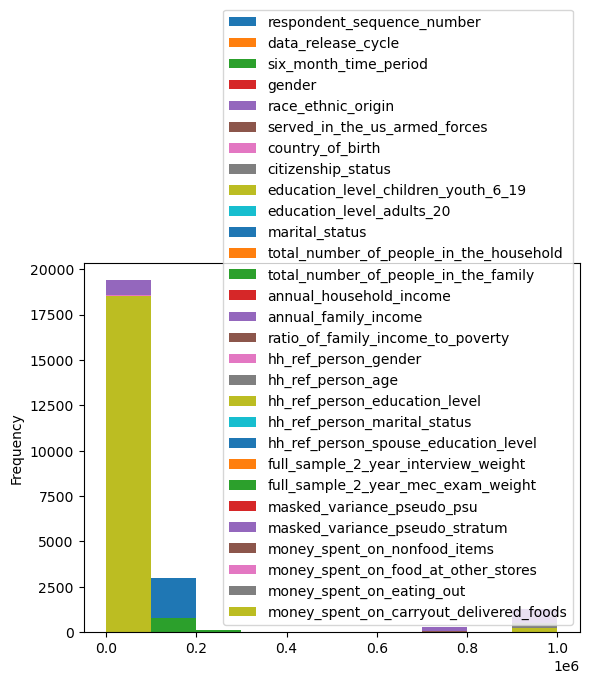

In [61]:
final_df.plot(x='money_spent_at_supermarket_grocery_store', kind='hist')